# <font color=black> __________________________________________________________________________________________________ </font>
# <font color=blue> Get <font color=red> **GREGS NZ** </font> output file details </font>

In [21]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib as plt
#

PATH        = '/projects/kopp/ggg46/nz_projections/regional/full_sample_workflows/wf_1e/ssp585/'
FILENAME1   = 'total-workflow.nc'
#
d_nc        = xr.open_dataset(PATH + FILENAME1)
lat = d_nc.lat
lon = d_nc.lon
d_nc

<xarray.Dataset>
Dimensions:           (samples: 20000, years: 9, locations: 7435)
Coordinates:
  * years             (years) int64 2020 2030 2040 2050 2060 2070 2080 2090 2100
  * locations         (locations) int64 0 1 2 3 4 5 ... 7430 7431 7432 7433 7434
  * samples           (samples) int64 0 1 2 3 4 ... 19996 19997 19998 19999
Data variables:
    sea_level_change  (samples, years, locations) float32 ...
    lat               (locations) float64 ...
    lon               (locations) float64 ...
Attributes:
    description:  Total sea-level change for workflow
    history:      Created Mon Aug 30 14:13:23 2021
    source:       FACTS: Post-processed total among available contributors: v...

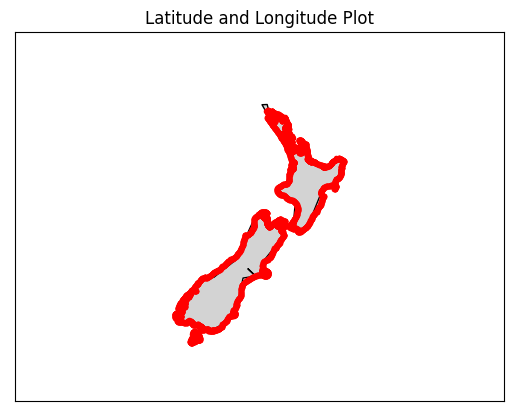

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# longitude = d_nc['lon'].to_dataframe().values.tolist()
# latitude = d_nc['lat'].to_dataframe().values.tolist()

longitude = d_nc['lon'].to_dataframe().values
latitude = d_nc['lat'].to_dataframe().values

# Latitude and longitude values for NZ
min_lon = 155.0
max_lon = 190.0
min_lat = -50.0
max_lat = -30.0

# Create the map
m = Basemap(projection='merc', llcrnrlat=min_lat, urcrnrlat=max_lat, llcrnrlon=min_lon, urcrnrlon=max_lon, resolution='c')
m.drawcoastlines()
m.fillcontinents(color='lightgray', lake_color='lightblue')
m.scatter(longitude, latitude, latlon=True, marker='.', color='red', zorder=5)

plt.title("Latitude and Longitude Plot")


plt.show()

# <font color=black>==============================================================</font>
# <font color=blue> RE-Create <font color=red> **location.lst** </font> based on 2km NZInsarGPS lat/lon </font>

In [27]:
import numpy as np
import re

# Initialize lists to hold data
qfmin = 5
lats = []
lons = []
vlm_rates = []
bop_rates = []
sigmas = []
qfs = []

FILENAME  = 'NZ_2km.txt'
PATH      = '/scratch/pk695/FACTS/002_fork/facts/JupNbk/000_pk-JupNb_TESTspace/2023-01_NZ_INSAR/XtractD_files_NZInsarGPS/'

# Name of the VLM data file
with open(PATH+FILENAME, 'r') as f:

    # Skip the header line
    line = f.readline()

    # Loop through the lines
    for line in f:

        # Strip the white space off the end of the line
        line.rstrip()

        # Get the pieces of data from the line
        lp = re.split("\s+", line)

        # Assign the data to their respective lists
        this_qf = float(lp[5])
        if(this_qf <= qfmin):
            lons.append(float(lp[0]))
            lats.append(float(lp[1]))
            vlm_rates.append(float(lp[2]))
            bop_rates.append(float(lp[3]))
            sigmas.append(float(lp[4]))
            qfs.append(this_qf)

# Convert lists to numpy arrays
lons = np.array(lons)
lats = np.array(lats)
vlm_rates = np.array(vlm_rates)
bop_rates = np.array(bop_rates)
sigmas = np.array(sigmas)
qfs = np.array(qfs)

In [28]:
with open("latlon.txt", "w") as file:
    count = 2000000000
    for i in range(len(lats)):
        lat_r = round(lats[i], 1)
        lon_r = round(lons[i], 1)
        grid_lat_lon = "grid_{}_{}".format(lat_r,lon_r)
        file.write(grid_lat_lon + "\t" + str(count) + "\t" + str(lats[i]) + "\t" + str(lons[i]) + "\n")
        count += 10

In [12]:
lat_r

-34.7